# Tarea 3: Creación de redes a apartir de los resultados del CAD

- Rosa Huamaní Pucho (20200422)
---
- El ejercicio tiene como objetivo evidenciar las relaciones entre las instituciones que han sido premiadas en la última edición de Ciudadanos al Día (CAD 2023), tomando en cuenta las categorías en las que han sido nominadas y los resultados obtenidos, ya sea como Buenas Prácticas, Mención Honrosa, Finalista o Ganadora.

- Cabe señalar que existen un total de 21 categorías de premiación, de las cuales, por motivos de practicidad en la elaboración de la data, se han considerado solo tres: Gestión Interna, Transparencia y Acceso a la Información, e Incidencia Pública. De este modo, al basar las conexiones entre instituciones en si han sido nominadas en las mismas categorías, se podrán identificar las relaciones significativas entre ellas.

- Toda la información ha sido extraída manualmente desde el visualizador de datos del CAD y del boletín informativo detallado sobre la premiación 2023.

## Paso 1: Cargamos la data

In [2]:
import networkx as nx

In [3]:
# Agregamos el link publicado del google sheets
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vTgFzH5FyDKFtJA8jBOud4inrENW_QPbIAUyKzhpPMOgDyFL3cVNf9MyWV5tglW-vbISTHwkKlvhfbI/pubhtml?gid=690333684&single=true",1200,350)

In [4]:
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vTgFzH5FyDKFtJA8jBOud4inrENW_QPbIAUyKzhpPMOgDyFL3cVNf9MyWV5tglW-vbISTHwkKlvhfbI/pub?gid=690333684&single=true&output=csv"
CADdata = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

In [5]:
CADdata.head()

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón,Buena práctica,Mención honrosa,Finalista,Ganador
AGN,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Newmont ALAC,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ATU,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Banco de la Nación,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Care Perú,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
CADdata.columns #Revisamos las columnas

Index(['AGN', 'Newmont ALAC', 'ATU', 'Banco de la Nación', 'Care Perú',
       'CEBA Murrieta', 'Central de compras', 'Promperú', 'Devida', 'Concytec',
       'Contraloría', 'Corte superior Lima Sur', 'Cetpro Marinero ', 'Drelm ',
       'Electroperú', 'Fissal', 'Fonafe', 'Grupo distriluz', 'Imarpe',
       'Ingemmet', 'Indecopi', 'Instituto de salud (INS)',
       'Instituto Nacional del Niño (insnsb)', 'Internet para todos', 'JNE',
       'MINCETUR', 'MINCU', 'Ministerio de defensa', 'MIDIS', 'MEF', 'MINEDU',
       'MINEM', 'MIMP', 'MTPE', 'MTC', 'VIVIENDA', 'MINAM', 'MININTER',
       'Ministerio Público', 'Muni Barranco', 'Muni Jesús María',
       'Muni La Molina', 'Muni Mi Perú', 'Muni Miraflores',
       'Muni Puente piedra', 'Muni SJL', 'Muni San Miguel',
       'Muni Santiago de Surco', 'Muni metro de Lima', 'Newmont Yanacocha',
       'ONP', 'Oefa', 'Osiptel', 'Osinergmin', 'Ositran',
       'Poder Judicial del Perú', 'PNP', 'PCM', 'Cuna Más', 'Qali Warma',
       'JUNTOS', 

## Paso 2: Matriz de adyacencia

In [7]:
#categorías
varsToDrop=["Buena práctica","Mención honrosa","Finalista","Ganador"]
adjacency=CADdata.drop(varsToDrop,axis=1)

#result
adjacency

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,SEAL,SBS,Sutran,Sunat,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón
AGN,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Newmont ALAC,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATU,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banco de la Nación,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Care Perú,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunarp,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
UGEL 01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
UGEL 05,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
UGEL 07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# utilizamos la matriz para graficar
import networkx as nx
CADNet = nx.from_pandas_adjacency(adjacency)

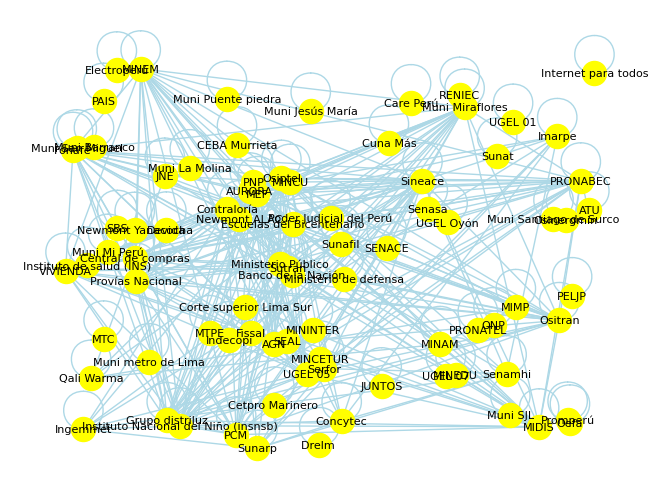

In [9]:
# plot
nx.draw_random(CADNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [10]:
# quitamos las autorrelaciones
CADNet.remove_edges_from(nx.selfloop_edges(CADNet))

In [11]:
# agregamos los atributos
dict(zip(CADdata.index,CADdata['Buena práctica']))
dict(zip(CADdata.index,CADdata['Mención honrosa']))
dict(zip(CADdata.index,CADdata['Finalista']))
dict(zip(CADdata.index,CADdata['Ganador']))

{'AGN': 0,
 'Newmont ALAC': 0,
 'ATU': 0,
 'Banco de la Nación': 0,
 'Care Perú': 0,
 'CEBA Murrieta': 0,
 'Central de compras': 0,
 'Promperú': 0,
 'Devida': 0,
 'Concytec': 1,
 'Contraloría': 0,
 'Corte superior Lima Sur': 0,
 'Cetpro Marinero ': 0,
 'Drelm ': 0,
 'Electroperú': 0,
 'Fissal': 1,
 'Fonafe': 1,
 'Grupo distriluz': 0,
 'Imarpe': 0,
 'Ingemmet': 0,
 'Indecopi': 1,
 'Instituto de salud (INS)': 1,
 'Instituto Nacional del Niño (insnsb)': 0,
 'Internet para todos': 0,
 'JNE': 0,
 'MINCETUR': 0,
 'MINCU': 0,
 'Ministerio de defensa': 0,
 'MIDIS': 1,
 'MEF': 0,
 'MINEDU': 0,
 'MINEM': 0,
 'MIMP': 0,
 'MTPE': 0,
 'MTC': 1,
 'VIVIENDA': 0,
 'MINAM': 1,
 'MININTER': 0,
 'Ministerio Público': 0,
 'Muni Barranco': 0,
 'Muni Jesús María': 0,
 'Muni La Molina': 0,
 'Muni Mi Perú': 0,
 'Muni Miraflores': 0,
 'Muni Puente piedra': 0,
 'Muni SJL': 0,
 'Muni San Miguel': 0,
 'Muni Santiago de Surco': 0,
 'Muni metro de Lima': 0,
 'Newmont Yanacocha': 1,
 'ONP': 0,
 'Oefa': 1,
 'Osiptel'

In [12]:
attributeToAdd_1=dict(zip(CADdata.index,CADdata['Buena práctica']))
attributeToAdd_2=dict(zip(CADdata.index,CADdata['Mención honrosa']))
attributeToAdd_3=dict(zip(CADdata.index,CADdata['Finalista']))
attributeToAdd_4=dict(zip(CADdata.index,CADdata['Ganador']))

nx.set_node_attributes(CADNet, attributeToAdd_1, 'Buena práctica')
nx.set_node_attributes(CADNet, attributeToAdd_2, 'Mención honrosa')
nx.set_node_attributes(CADNet, attributeToAdd_3, 'Finalista')
nx.set_node_attributes(CADNet, attributeToAdd_4, 'Ganador')

## Paso 3: Graficamos con los atributos 

In [13]:
import matplotlib.pyplot as plt

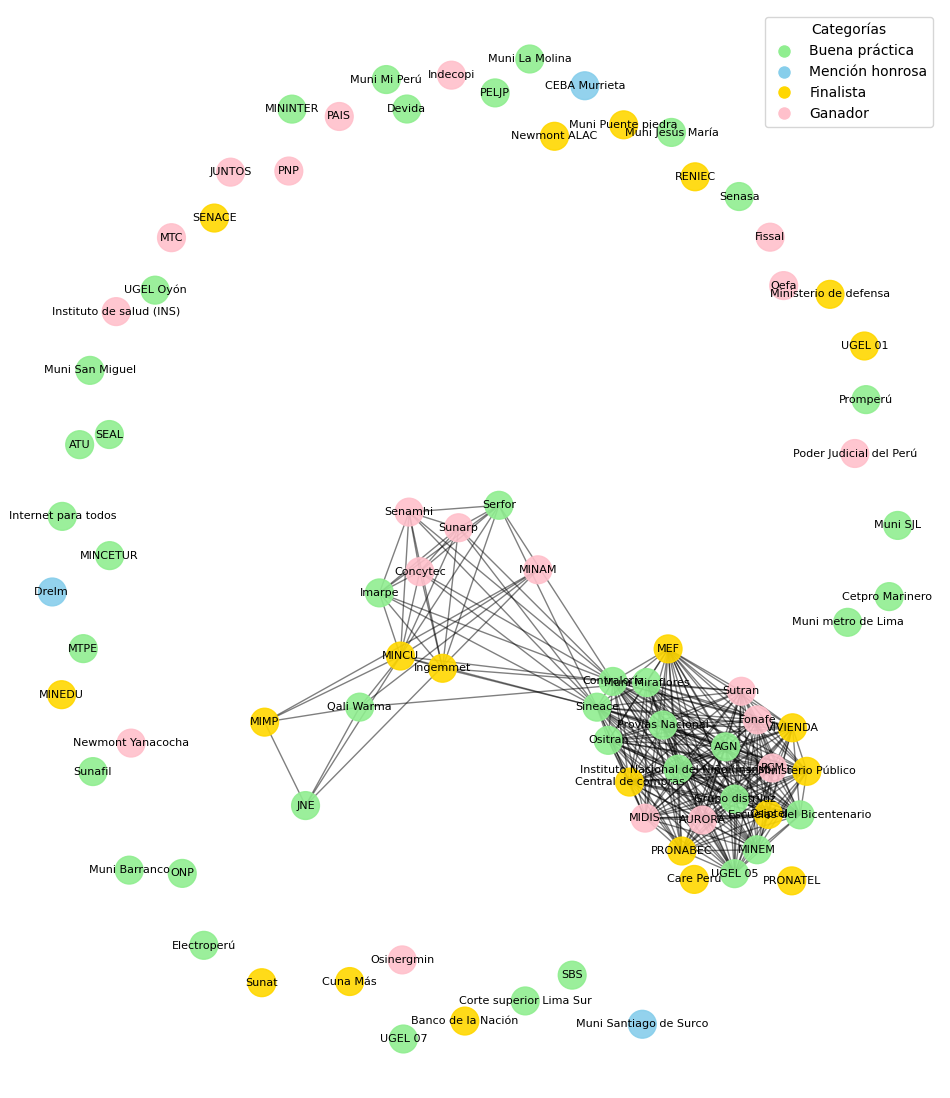

In [14]:

# categorías
colors = {
    node: ('lightgreen' if data.get('Buena práctica', 0) == 1 else
           'skyblue' if data.get('Mención honrosa', 0) == 1 else
           'gold' if data.get('Finalista', 0) == 1 else
           'pink' if data.get('Ganador', 0) == 1 else
           'grey')  # in case one of our categories doesn't fit 
    for node, data in CADNet.nodes(data=True)
}


nx.set_node_attributes(CADNet, colors, 'color')


plt.figure(figsize=(12, 14))

# Ajusta el layout para aumentar el espacio entre nodos
pos = nx.spring_layout(CADNet, k=0.8, iterations=50)  

# # Dibuja los nodos
nx.draw_networkx_nodes(CADNet, pos, node_size=400, node_color=[data['color'] for _, data in CADNet.nodes(data=True)], alpha=0.9)

# Names
nx.draw_networkx_labels(CADNet, pos, font_size=8, font_color='black')

nx.draw_networkx_edges(CADNet, pos, width=1, alpha=0.5)

# Guide with the names
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Buena práctica', markersize=10, markerfacecolor='lightgreen'),
    Line2D([0], [0], marker='o', color='w', label='Mención honrosa', markersize=10, markerfacecolor='skyblue'),
    Line2D([0], [0], marker='o', color='w', label='Finalista', markersize=10, markerfacecolor='gold'),
    Line2D([0], [0], marker='o', color='w', label='Ganador', markersize=10, markerfacecolor='pink')
]
plt.legend(handles=legend_elements, loc='upper right', title="Categorías")

plt.axis('off')  
plt.show()

In [15]:
#Revisamos la conectividad entre cada categoría

categorias = ['Buena práctica', 'Mención honrosa', 'Finalista', 'Ganador']
conectividad = {}

for categoria in categorias:
    nodos_categoria = [n for n, attr in CADNet.nodes(data=True) if attr.get(categoria, 0) == 1]
    subgrafo = CADNet.subgraph(nodos_categoria)
    conectividad[categoria] = nx.number_of_edges(subgrafo)  

for cat, conn in conectividad.items():
    print(f"Conectividad interna de {cat}: {conn}")

Conectividad interna de Buena práctica: 62
Conectividad interna de Mención honrosa: 0
Conectividad interna de Finalista: 17
Conectividad interna de Ganador: 13


## Paso 4: Análisis

In [16]:
len(CADNet.nodes),len(CADNet.edges)

(84, 277)

- De acuerdo al informe del CAD 2023, hubieron 84 instituciones que se presentaron a los premios, todas estas fueron consideradas en la BD
- Hay 277 conexiones entre estas, tomando en consideración solo 3 categorías de las 21 que se emplean en los premios

In [17]:
len(list(nx.connected_components(CADNet))) #Conectividad

52

- Hay 52 componente conectados en el grafo, esto sugiere que hay en teorias 52 subgrupos que no mantiene conexión con otrso subgrupos, esto sugiere la presencia de clusters

In [18]:
# Estos son todos los nodos aislados
list(nx.isolates(CADNet))

['Newmont ALAC',
 'ATU',
 'Banco de la Nación',
 'Care Perú',
 'CEBA Murrieta',
 'Promperú',
 'Devida',
 'Corte superior Lima Sur',
 'Cetpro Marinero ',
 'Drelm ',
 'Electroperú',
 'Fissal',
 'Indecopi',
 'Instituto de salud (INS)',
 'Internet para todos',
 'MINCETUR',
 'Ministerio de defensa',
 'MINEDU',
 'MTPE',
 'MTC',
 'MININTER',
 'Muni Barranco',
 'Muni Jesús María',
 'Muni La Molina',
 'Muni Mi Perú',
 'Muni Puente piedra',
 'Muni SJL',
 'Muni San Miguel',
 'Muni Santiago de Surco',
 'Muni metro de Lima',
 'Newmont Yanacocha',
 'ONP',
 'Oefa',
 'Osinergmin',
 'Poder Judicial del Perú',
 'PNP',
 'Cuna Más',
 'JUNTOS',
 'PRONATEL',
 'PAIS',
 'PELJP',
 'RENIEC',
 'SENACE',
 'Senasa',
 'SEAL',
 'SBS',
 'Sunat',
 'Sunafil',
 'UGEL 01',
 'UGEL 07',
 'UGEL Oyón']

In [19]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(CADNet), key=len)
CADNet_largest=CADNet.subgraph(largest_cc_nodes)

nx.diameter(CADNet_largest)

3

El diámetro del componente más grande es 3, lo que indica que la distancia máxima entre dos nodos en este grupo es de tres conexiones, lo que refleja que las instituciones están bien conectadas y es fácil moverse de una a otra dentro de esta red.

In [22]:
# geodesics
geodesics = dict(nx.all_pairs_shortest_path_length(CADNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in CADNet.nodes] for n in CADNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=CADNet.nodes, columns=CADNet.nodes)

# we get
MatrixGeo_DF

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,SEAL,SBS,Sutran,Sunat,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón
AGN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
Newmont ALAC,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATU,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banco de la Nación,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Care Perú,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunarp,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,NaN,0.0,NaN,2.0,NaN,NaN
UGEL 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
UGEL 05,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,2.0,NaN,0.0,NaN,NaN
UGEL 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Los valores en la tabla son las distancias geodésicas, donde cada celda muestra la mínima cantidad de pasos requeridos para ir de un nodo a otro en la red de docentes. Como se aprecia en la mayoría de casos, no existe conexión entre los pares de nodos.

In [23]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,84.0
1.0,554.0
2.0,388.0
3.0,114.0
NaN,5916.0


Se observa que hay 84 nodos autoconectados, 554 conexiones directas y un número decreciente de conexiones que requieren más pasos, con 388 y 144 conexiones para dos, tres pasos respectivamente. No obstante, 5916 pares de nodos no tienen conexión directa o indirecta, destacando una significativa falta de cohesión en la red para las tres categorías utilizadas. 